In [1]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
from utils import lis, layers, min_distance, data_prepare, embedding_squared

In [4]:
chip_1, chip_2, connections = data_prepare()

In [5]:
new_points, subsequences = layers(chip_1, chip_2, connections)

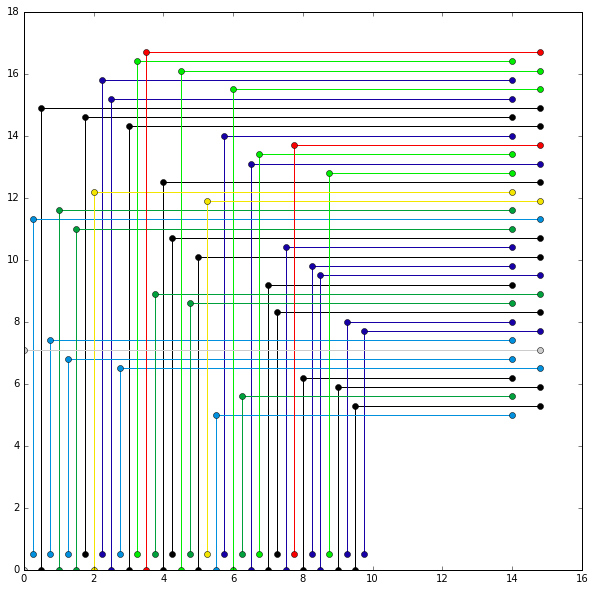

In [6]:
#experiments
NUM_COLORS = len(subsequences)
cm = plt.get_cmap('nipy_spectral')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_list = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=[10, 10])
for num, subseq in enumerate(subsequences):
    c = color_list[num]
    for connect in connections.values[subseq]:
        if chip_2.values[connect[1]][0] < 14.5:
            plt.plot([chip_1.values[connect[0]][0], 
                      chip_1.values[connect[0]][0], 
                      chip_2.values[connect[1]][0]], 
                     [chip_1.values[connect[0]][1], 
                      chip_2.values[connect[1]][1], 
                      chip_2.values[connect[1]][1]], '-o', color=c)
        if chip_2.values[connect[1]][0] > 14.5:
            plt.plot([chip_1.values[connect[0]][0], 
                      chip_1.values[connect[0]][0], 
                      chip_2.values[connect[1]][0]], 
                     [chip_1.values[connect[0]][1], 
                      chip_2.values[connect[1]][1]+0.3,
                      chip_2.values[connect[1]][1]+0.3], '-o', color=c)

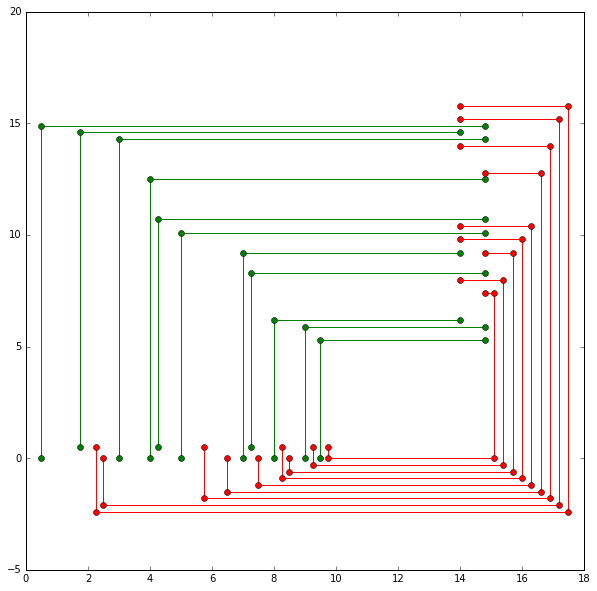

In [7]:
plt.figure(figsize=[10, 10])

for i in embedding_squared(connections, subsequences[0], subsequences[1], chip_1, chip_2)[0]:
    plt.plot(i[0],i[1], 'o-', color='g')

for i in embedding_squared(connections, subsequences[0], subsequences[1], chip_1, chip_2)[1]:
    plt.plot(i[0],i[1], 'o-', color='r')